# I. Import and explore data sets

## I.1 Import data and libraries

In [1]:
# Import the required libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # optinal (only use to hide warnings)

In [2]:
# Defining the figures style and size
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

In [3]:
# Import the train set and the test set
train_set = pd.read_csv('https://raw.githubusercontent.com/descartes-underwriting/data-scientist-technical-test/main/data/auto-insurance-fall-2017/train_auto.csv', low_memory=False)
print(f"- The train data set includ: {train_set.shape[0]} rows and {train_set.shape[1]} columns")

test_set = pd.read_csv('https://raw.githubusercontent.com/descartes-underwriting/data-scientist-technical-test/main/data/auto-insurance-fall-2017/test_auto.csv', low_memory=False)
print(f"- The test data set includ: {test_set.shape[0]} rows and {test_set.shape[1]} columns")

- The train data set includ: 8161 rows and 26 columns
- The test data set includ: 2141 rows and 26 columns


## I.2 Explore and clean the data

In [4]:
# Let's check if the column headings are the same in both data sets
dif_1 = [x for x in train_set.columns if x not in test_set.columns] # columns that are present in train_set and absent in test_set 
dif_2 = [x for x in test_set.columns if x not in train_set.columns] # columns that are present in test_set and absent in train_set

if len(dif_1) == 0 and len(dif_2)==0:
    print("The column headings are the same in both datasets")
else:
    print("The column headings are NOT the same in both datasets")

The column headings are the same in both datasets


In [5]:
# Let's explore the content of train data set
print(train_set.dtypes)
train_set.iloc[:3,:]

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban


We can notice that the type of data for some column is not coherent.
For example HOME_VAL, INCOME, BLUEBOOK and OLDCLAIM are object instead of float or integer. This is due to the presence of the character $ and coma in the data.

In [6]:
# Convert from object to float the data in the columns "INCOME", "HOME_VAL", "BLUEBOOK", "OLDCLAIM"

columns  = ["INCOME", "HOME_VAL", "BLUEBOOK", "OLDCLAIM"]

for i in columns:
    # Train set
    train_set[i] = train_set[i].str.replace(',','') # To replace',' with nothing
    train_set[i] = train_set[i].str.replace('$','') # To replace'$' with nothing
    train_set[i] = pd.to_numeric(train_set[i],errors = 'coerce') # Convert object to float
    
    # Test set
    test_set[i] = test_set[i].str.replace(',','') 
    test_set[i] = test_set[i].str.replace('$','') 
    test_set[i] = pd.to_numeric(test_set[i],errors = 'coerce')

### I.2.1 Missing data

In [7]:
# Let's check the number and percentage of missing data in each column of both data sets

for tab, data_set in zip([train_set, test_set], ["Train set", "Test set"]):
    column_name =[]; percent_nan=[]; number_nan =[]
    column_with_nan = tab.columns[tab.isnull().any()]
    
    for column in column_with_nan:
        column_name.append(column)
        number_nan.append(tab[column].isnull().sum())
        percent_nan.append(round(tab[column].isnull().sum()*100/len(tab),2))
    
    tab_nan = pd.DataFrame(column_name, columns = ["Column"])
    tab_nan["Number of NaN"], tab_nan["Percentage of NaN"] = number_nan, percent_nan
    print(f"- {data_set}:\n {tab_nan}\n")

- Train set:
      Column  Number of NaN  Percentage of NaN
0       AGE              6               0.07
1       YOJ            454               5.56
2    INCOME            445               5.45
3  HOME_VAL            464               5.69
4       JOB            526               6.45
5   CAR_AGE            510               6.25

- Test set:
         Column  Number of NaN  Percentage of NaN
0  TARGET_FLAG           2141             100.00
1   TARGET_AMT           2141             100.00
2          AGE              1               0.05
3          YOJ             94               4.39
4       INCOME            125               5.84
5     HOME_VAL            111               5.18
6          JOB            139               6.49
7      CAR_AGE            129               6.03



In both datasets the number of NaN does not exceed 6% per column (except 100% of NaN for the target columns in the test set because it is the variable to predict).

### I.2.2 Imputation

In [8]:
# Drop NaN of some columns where imputation could potentially introduce errors

# Train set
train_set = train_set.dropna(subset=['JOB', 'AGE','YOJ'])
print(f"- Train set shape: {train_set.shape}")

# Test set 
# I will drop all the NaN of Test set because it is on this data set that I will make the predictions
test_set = test_set.dropna(subset=['JOB', 'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE'])
print(f'- Test set shape {test_set.shape}')

- Train set shape: (7205, 26)
- Test set shape (1612, 26)


To avoid further data loss, I will apply a mean imputation based on the categorical variable 'JOB'.

Here's the figure that shows the distribution of values of INCOME, HOME_VALUE and CAR_AGE per type of JOB

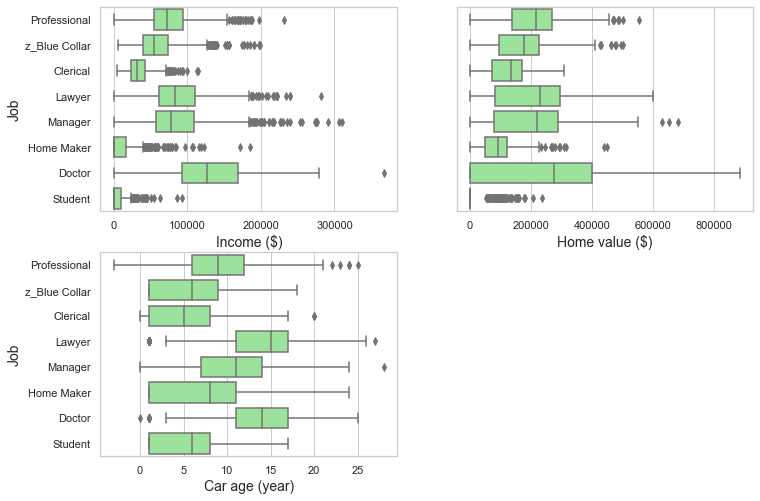

In [9]:
fig, axes = plt.subplots(2, 2)

# INCOME
p = sns.boxplot(ax = axes[0,0], x=train_set["INCOME"], y=train_set["JOB"], color = "lightgreen")
p.set_xlabel ("Income ($)\n", fontsize=14)
p.set_ylabel ("Job", fontsize=14)

# HOME_VAL
q = sns.boxplot(ax = axes[0,1], x=train_set["HOME_VAL"], y=train_set["JOB"], color = "lightgreen")
q.set_xlabel ("Home value ($)", fontsize=14)
q.set(ylabel=None)
q.axes.yaxis.set_visible(False)# y axis invisible

# CAR_AGE
q = sns.boxplot(ax = axes[1,0], x=train_set["CAR_AGE"], y=train_set["JOB"], color = "lightgreen")
q.set_xlabel ("Car age (year)", fontsize=14)
q.set_ylabel ("Job", fontsize=14)
axes.flat[-1].set_visible(False) # to remove the last empty figure

The distribution of values INCOME, HOME_VALUE and CAR_AGE is heterogeneous between the different jobs. I will impute the missing data of these columns by the corresponding mean of each job category.

In [10]:
# Calculation of mean INCOME, HOME_VAL and CAR_AGE by JOB categories
columns = ['INCOME', 'HOME_VAL', 'CAR_AGE', 'JOB']

df_mean = train_set.dropna(subset=columns).loc[:,columns]
df_mean = df_mean.groupby('JOB').mean()
df_mean = df_mean.rename_axis('index').reset_index().rename(columns = {'index':'JOB',
                                                                       'INCOME':'INCOME_mean',
                                                                       'HOME_VAL':'HOME_VAL_mean',
                                                                       'CAR_AGE':'CAR_AGE_mean'})

# Merge the means to the original data
train_set = pd.merge(train_set, df_mean, on=['JOB'], how='left')


# Define a function to replace the each NaN 
# of the columns INCOME, HOME_VAL and CAR_AGE by their corresponding means
for i, j in zip(['INCOME', 'HOME_VAL', 'CAR_AGE'], ['INCOME_mean', 'HOME_VAL_mean', 'CAR_AGE_mean']):
    def mean_imputation(x):
        if np.isnan(x[i]):
            return x[j]
        else:
            return x[i]

    train_set[i] = train_set.apply(lambda x: mean_imputation(x), axis=1)

# Drop all the columns 'mean'
train_set.drop(['INCOME_mean', 'HOME_VAL_mean', 'CAR_AGE_mean'], axis=1, inplace=True)

# II. Feature engineering

### II.1 Transform categorical variables into binary

In [11]:
# Columns with two unique values (Yes & No): 'No' will be replaced by 0 and 'Yes' by 1. 
# Column SEX becomes SEX_FEMALE where 'z_F' will be replaced by 1 and 'M' by 0.
# Same logic applied for CAR_USE and URBANICITY.

columns  = ["PARENT1", "MSTATUS", "SEX", "CAR_USE", "RED_CAR", "REVOKED", "URBANICITY"]

for i in columns:
    # Train set
    train_set[i] = train_set[i].str.replace('No|z_No|no|M|Commercial|z_Highly Rural/ Rural', '0') # To replace all  with 0
    train_set[i] = train_set[i].str.replace('Yes|yes|z_F|Private|Highly Urban/ Urban', '1') # To replace'Yes' with 1
    
    # Test set
    test_set[i] = test_set[i].str.replace('No|z_No|no|z_F|Commercial|z_Highly Rural/ Rural', '0') # To replace all  with 0
    test_set[i] = test_set[i].str.replace('Yes|yes|M|Private|Highly Urban/ Urban', '1') # To replace'Yes' with 1
    
    # Convert object to float
    train_set[i] = pd.to_numeric(train_set[i],errors = 'coerce')
    test_set[i] = pd.to_numeric(test_set[i],errors = 'coerce')
    
train_set = train_set.rename(columns={'SEX':'SEX_FEMALE', 'CAR_USE':'PRIVATE_USE'}) # more suitable column name
test_set = test_set.rename(columns={'SEX':'SEX_FEMALE', 'CAR_USE':'PRIVATE_USE'}) # more suitable column name

In [12]:
# Transformation of 'JOB' and 'CAR_TYPE' columns into binary data using dummies

# Train set
for i in ['JOB', 'CAR_TYPE']:
    df_dummies = pd.get_dummies(train_set[i], prefix=i)
    train_set = train_set.join(df_dummies)

train_set.drop(['JOB', 'CAR_TYPE'], axis=1, inplace=True) # drop the original columns


# Test set
for i in ['JOB', 'CAR_TYPE']:
    df_dummies = pd.get_dummies(test_set[i], prefix=i)
    test_set = test_set.join(df_dummies)

test_set.drop(['JOB', 'CAR_TYPE'], axis=1, inplace=True)

In [13]:
# Droping columns that I don't use in models.
# Droping EDUCATION: it is less relevant than JOB and to avoid adding 5 more features from the EDUCATION columns

train_set_final = train_set.drop(['INDEX', 'TARGET_AMT', 'EDUCATION'], axis=1)
test_set_final = test_set.drop(['INDEX', 'TARGET_AMT', 'EDUCATION'], axis=1)

print(f'I ended up with a:\n- Train set of {train_set_final.shape[0]} rows and {train_set_final.shape[1]} columns')
print(f'- Test set of {test_set_final.shape[0]} rows and {test_set_final.shape[1]} columns')

I ended up with a:
- Train set of 7205 rows and 35 columns
- Test set of 1612 rows and 35 columns


# III. Modeling

### III.1   Extract the features (X) and the target 'TARGET_FLAG' (y)  and split the data into training and test

In [14]:
# Required libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [15]:
# Features (X)
train_features = train_set_final[[i for i in list(train_set_final.columns) if i != "TARGET_FLAG"]]
X = train_features.loc[:,:]

# Target (y)
y = train_set_final.loc[:,"TARGET_FLAG"]

# Split the Train set into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    shuffle=True,
                                                    test_size=0.25)

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

print(f'X_train shape: {X_train_std.shape}\ny_train shape: {y_train.shape}\n')
print(f'X_test shape: {X_test_std.shape}\ny_test shape: {y_test.shape}')

X_train shape: (5403, 34)
y_train shape: (5403,)

X_test shape: (1802, 34)
y_test shape: (1802,)


### III.2 Models and metrics selection

- Accuracy: 
it measures how many observations, both positive and negative, were correctly classified.


- Precision: 
it measures how many observations predicted as positive are in fact positive, tp/(tp+fp).


- Recall:
it measures how many observations out of all positive observations have we classified as positive, tp/(tp+fn).


- F1_score Weighted:
F1 is a harmonic mean of precision and recall.
F1_weighted calculate f1 for each label, and returns the average considering the proportion for each label in the dataset.


- Roc curve:
it is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR).


- Roc score:
it calculate the Area under the ROC Curve in order to get one number that tells us how good our curve is. 

In [16]:
# Let's define a function for each of these metrics
def accuracy_score(test, pred):
    Acc = accuracy_score(test, pred)
    return Acc

def precision(test, pred):
    prec = precision_score(test, pred, average='binary')
    return prec

def recall(test, pred):
    rec = recall_score(test, pred, average='binary')
    return rec

def f1_weighted(test, pred):
    f1 = f1_score(test, pred, average = 'weighted')
    return f1

def roc(test, pred):
    pred = classifier.predict_proba(X_test_std)
    pred = pred[:, 1]
    roc_auc = roc_auc_score(test, pred) # calculate roc score
    
    ns_probs = [0 for _ in range(len(test))] # generate 0 (majority class)
    ns_fpr, ns_tpr, _ = roc_curve(test, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(test, pred) # calculate roc curve
    
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--') # plot the roc curve for each classifier
    pyplot.plot(model_fpr, model_tpr, marker='.', label=classifier.__class__.__name__)
    pyplot.xlabel('False Positive Rate'), pyplot.ylabel('True Positive Rate'), pyplot.legend()
        
    return roc_auc
    return pyplot.show()
    
    
# Print the scores
def print_score(test, pred):
    print(f"- Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(test, pred)}")
    print(f"Precision: {precision(test, pred)}")
    print(f"Recall: {recall(test, pred)}")
    print(f"F1 weighted: {f1_weighted(test, pred)}")
    print(f"Roc Auc score: {roc(test, pred)}\n")    

- Classifier: LogisticRegression
Accuracy: 0.7963374028856826
Precision: 0.6677018633540373
Recall: 0.45263157894736844
F1 weighted: 0.7823393369082697
Roc Auc score: 0.8067139967477096

- Classifier: SVC
Accuracy: 0.7957824639289678
Precision: 0.6877192982456141
Recall: 0.4126315789473684
F1 weighted: 0.777076884411913
Roc Auc score: 0.7888954110974498

- Classifier: DecisionTreeClassifier
Accuracy: 0.7125416204217536
Precision: 0.4535637149028078
Recall: 0.4421052631578947
F1 weighted: 0.7113498105505224
Roc Auc score: 0.6257248244953001

- Classifier: RandomForestClassifier
Accuracy: 0.7902330743618202
Precision: 0.7063829787234043
Recall: 0.3494736842105263
F1 weighted: 0.7634775160569962
Roc Auc score: 0.8089247610359735



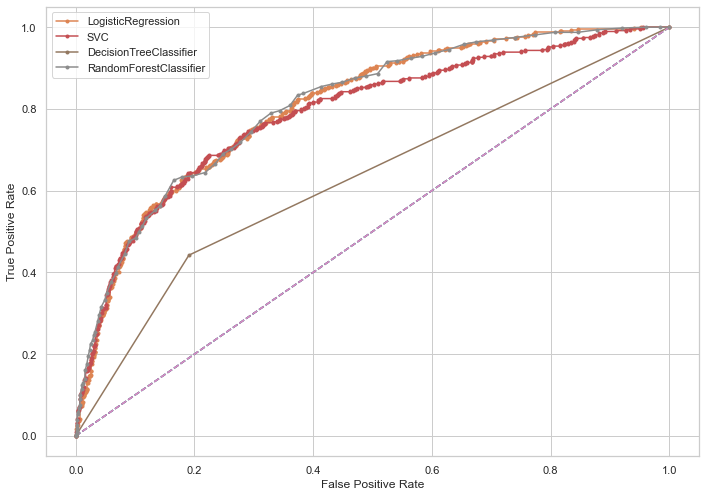

In [17]:
# Required libraries
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define classifier
lr = LogisticRegression()
svm = svm.SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

for classifier in [lr, svm, dtc, rfc]:
    classifier.fit(X_train_std, y_train)
    y_pred = classifier.predict(X_test_std)
    
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

The results show that the DecisionTreeClassifier has a lower performance than the other classifiers. So, in the next part I will optimize the hyperparameters of LogisticRegression, SVC and RandomForestClassifier

Moreover, we can notice that the accuracy seems to overestimate the performance of the classifiers. However, F1_score Weighted is more suitable because it takes into account each class’s occurrences in the data set.
Thus, F1_weighted will be used to optimize and evaluate the 3 chosen models

### III.3 Hyper parameters optimization on the selected models

In [18]:
from sklearn import svm

# Define model
lr = LogisticRegression()
svm_model = svm.SVC()
rfc = RandomForestClassifier()

# Define hyperparemeters for each model
grid_lr = {'C': np.logspace(-3,3,7),
           'max_iter': [100, 1000, 10000]}


grid_svm = {'C': [10, 1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['linear', 'rbf', 'sigmoid']} # rbf: gaussian


grid_rfc = {'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,6,8],
        'criterion' :['gini', 'entropy']}

# Define the scoring
score = "f1_weighted"

In [19]:
import timeit
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Create emplty list to add each running time and F1 score of each classifier in these lists
Models, F1_score, Time = [], [], [] 


# Hyperparameters tunning for each model
for model, grid in zip([lr, svm_model, rfc], [grid_lr, grid_svm, grid_rfc]):
            
    start_time = timeit.default_timer() # start the timer
    
    # GridSearch                                
    gs_model = GridSearchCV(model, grid, cv=10, scoring=score)
    
    # Fit the model
    gs_model.fit(X_train_std, y_train)
    
    elapsed = timeit.default_timer() - start_time
    
    # Add the running time of each classifier to the list Time
    Models.append(model)
    Time.append(round(elapsed/60, 2)) # stop the timer. time in minutes (ealpsed/60)
    
    # Print the output of the best hyperparameters
    print(f'{model}: tuned hpyerparameters: {gs_model.best_params_}')
    print(f'F1 score: {gs_model.best_score_}')
    print('--'*50)

LogisticRegression(): tuned hpyerparameters: {'C': 1.0, 'max_iter': 100}
F1 score: 0.775162637189241
----------------------------------------------------------------------------------------------------
SVC(): tuned hpyerparameters: {'C': 1, 'kernel': 'rbf'}
F1 score: 0.7725449308725824
----------------------------------------------------------------------------------------------------
RandomForestClassifier(): tuned hpyerparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
F1 score: 0.7392555013622294
----------------------------------------------------------------------------------------------------


In [20]:
# Final models with optimal hyperparameters

lr_final = LogisticRegression(C=1, max_iter=100)

svm_final = svm.SVC(C=1, kernel='rbf')

rfc_final = RandomForestClassifier(criterion='gini',
                                     max_depth=8,
                                     max_features='log2',
                                     n_estimators=200)


# Fit the model
for model_final in [lr_final, svm_final, rfc_final]:
    # fit the model
    model_final.fit(X_train_std, y_train)
    
    # predict on the test set
    y_pred = model_final.predict(X_test_std)
    
    # Estimate the metric
    F1_score.append(round(f1_weighted(y_test, y_pred), 2))
    

# Print the results of each model
Model_results = pd.DataFrame(list(zip(Models, F1_score, Time)), columns = ["Model", "F1_score", "Tunning_Time (min)"])
Model_results

,Model,F1_score,Tunning_Time (min)
0,LogisticRegression(),0.78,0.05
1,SVC(),0.78,3.24
2,RandomForestClassifier(),0.73,7.42


- Conclusion:

By comparing the performances of the classifiers on X_test, we can notice that the F1_score and the running time are the most optimal for LogisticRegression().

Logistic Regression Classifier will be used to predict 'TARGET_FLAG' of the Test set

### III.4 Prediction on the Test set

In [21]:
# Drop the target variable in Descartes underwriting test set
test_set_final.drop(['TARGET_FLAG'], axis=1, inplace=True)

# Standarize the features
test_set_std = std_scale.transform(test_set_final)
prediction = lr_final.predict(test_set_std).tolist()

# Create a data frame which contains the columns 'INDEX' and predicted 'TARGET_FLAG'.
my_prediction = pd.DataFrame()

my_prediction['INDEX'], my_prediction['TARGET_FLAG'] = test_set['INDEX'].tolist(), prediction
my_prediction.head()

,INDEX,TARGET_FLAG
0,3,0
1,9,0
2,10,0
3,21,0
4,31,0


In [26]:
# Save the predictions table into a csv file
my_prediction.to_csv("my_prediction_ao.csv", index=False)